In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
data = pd.read_csv('C://Users//home//Downloads//kidney_disease.csv')

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null category
pc                335 non-null category
pcc               396 non-null category
ba                396 non-null category
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               329 non-null float64
wc                294 non-null float64
rc                269 non-null float64
htn               398 non-null category
dm                398 non-null category
cad               398 non-null category
appet             399 non-null c

In [6]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [19]:
for col in data.select_dtypes('object'):
    data[col] = data[col].astype('category')

In [8]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [23]:
cat_cols = list(data.select_dtypes('category').columns)
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [22]:
num_cols = list(data.select_dtypes(['int64','float64']).columns)
num_cols 

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [11]:
value_counts_lst = [data[col].value_counts() for col in cat_cols]
value_counts_lst

[normal      201
 abnormal     47
 Name: rbc, dtype: int64, normal      259
 abnormal     76
 Name: pc, dtype: int64, notpresent    354
 present        42
 Name: pcc, dtype: int64, notpresent    374
 present        22
 Name: ba, dtype: int64, 52      21
 41      21
 44      19
 48      19
 40      16
 43      14
 42      13
 45      13
 33      12
 28      12
 32      12
 36      12
 50      12
 37      11
 34      11
 46       9
 29       9
 35       9
 30       9
 31       8
 39       7
 24       7
 26       6
 38       5
 54       4
 51       4
 47       4
 49       4
 53       4
 27       3
 25       3
 22       3
 23       2
 19       2
 14       1
 16       1
 \t?      1
 15       1
 9        1
 17       1
 18       1
 20       1
 21       1
 \t43     1
 Name: pcv, dtype: int64, 9800      11
 6700      10
 9200       9
 7200       9
 9600       9
           ..
 15700      1
 14900      1
 13600      1
 12700      1
 \t6200     1
 Name: wc, Length: 92, dtype: int64, 5.2    18
 4.5

In [16]:
for col in ['pcv','wc','rc','dm','cad','classification']:
    data[col] = data[col].replace(regex={r'\t': ''})
    data[col] = data[col].replace('?',np.nan)
    data[col] = data[col].str.strip()

In [17]:
for col in ['pcv','wc','rc']:
    data[col] = data[col].astype('float')

In [24]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [25]:
data_cat_cols = data[cat_cols]
data_cat_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [26]:
data_num_cols = data[num_cols]
data_num_cols 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_num_cols = pd.DataFrame(imputer.fit_transform(data_num_cols),columns=data_num_cols.columns)
data_num_cols

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,131.6,3.96,15.4,44.0,7800.0,5.20
1,1.0,7.0,50.0,1.020,4.0,0.0,184.2,18.0,0.8,129.4,4.00,11.3,38.0,6000.0,3.58
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,134.2,4.50,9.6,31.0,7500.0,3.56
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,129.8,3.82,11.6,35.0,7300.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.90,15.7,47.0,6700.0,4.90
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.50,16.5,54.0,7800.0,6.20
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.40,15.8,49.0,6600.0,5.40
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.90,14.2,51.0,7200.0,5.90


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_cat_cols = pd.DataFrame(imputer.fit_transform(data_cat_cols),columns=data_cat_cols.columns)

In [29]:
data[num_cols] = data_num_cols
data[cat_cols] = data_cat_cols
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.20,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,3.58,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,3.56,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.90,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.60,no,no,no,good,no,no,ckd


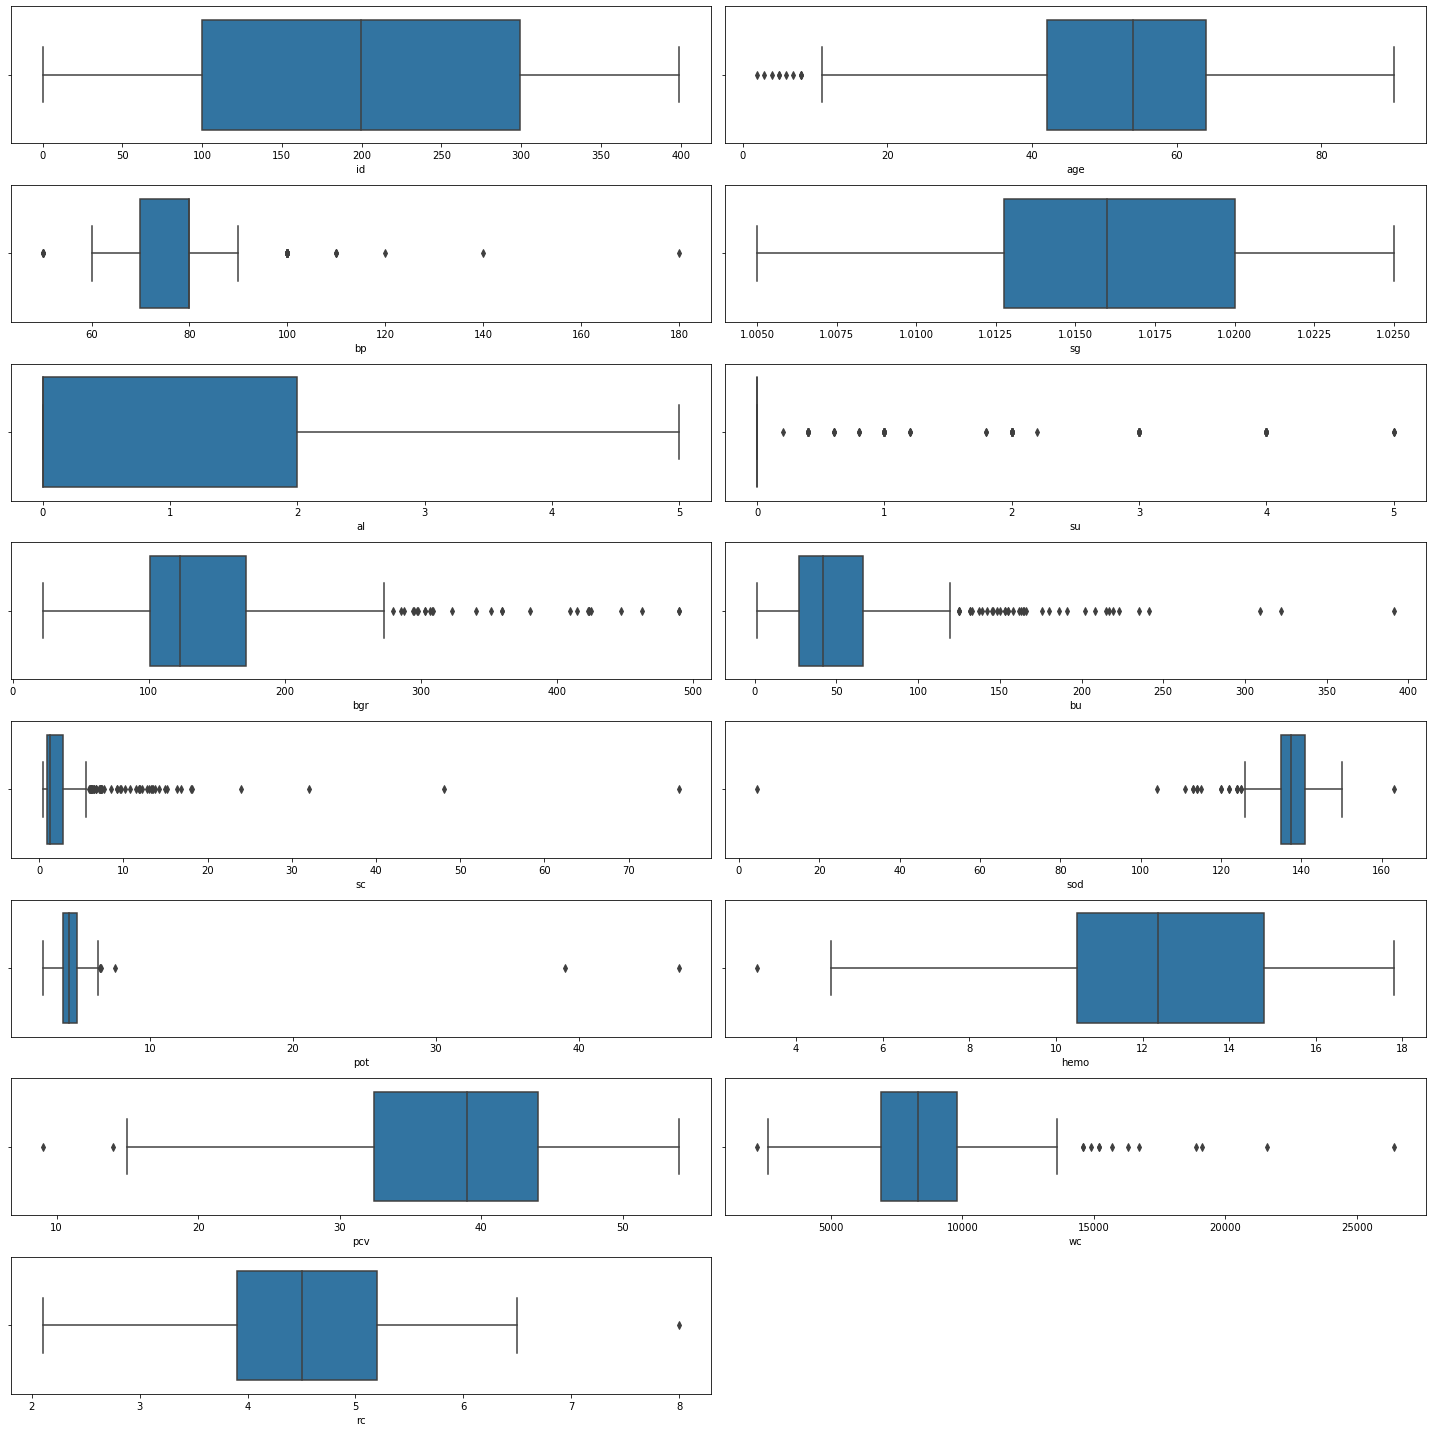

In [96]:
i =1 
fig = plt.figure(figsize=(20,20))
for col in num_cols:
    plt.subplot(8,2,i)
    sns.boxplot(data[col])
    i = i+1
plt.tight_layout()
plt.show()

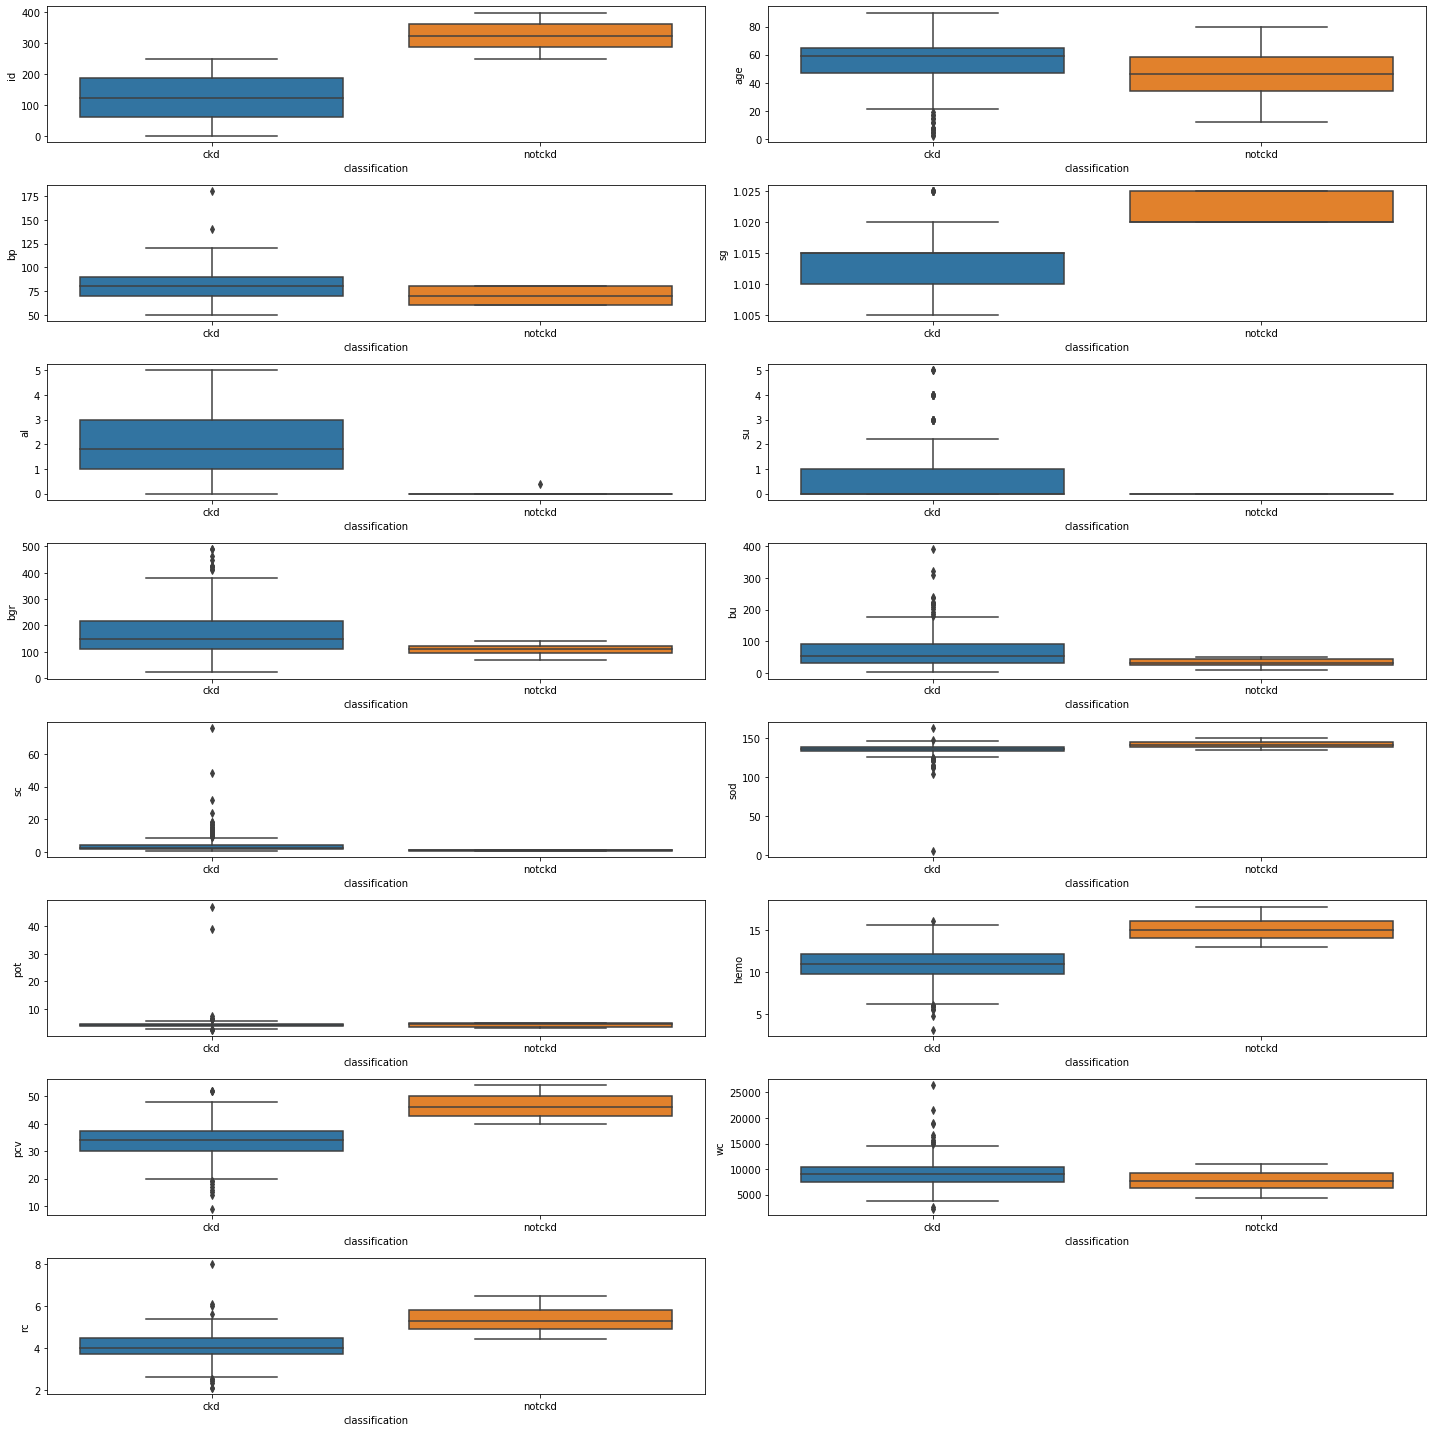

In [97]:
i =1 
fig = plt.figure(figsize=(20,20))
for col in num_cols:
    plt.subplot(8,2,i)
    sns.boxplot(data['classification'],data.loc[:,col])
    i = i+1
plt.tight_layout()
plt.show()

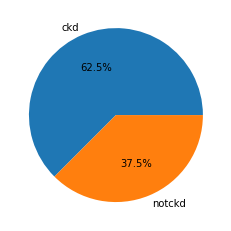

In [109]:
plt.pie(data['classification'].value_counts(),labels = list(data['classification'].value_counts().index),autopct = '%1.1f%%')
plt.show()

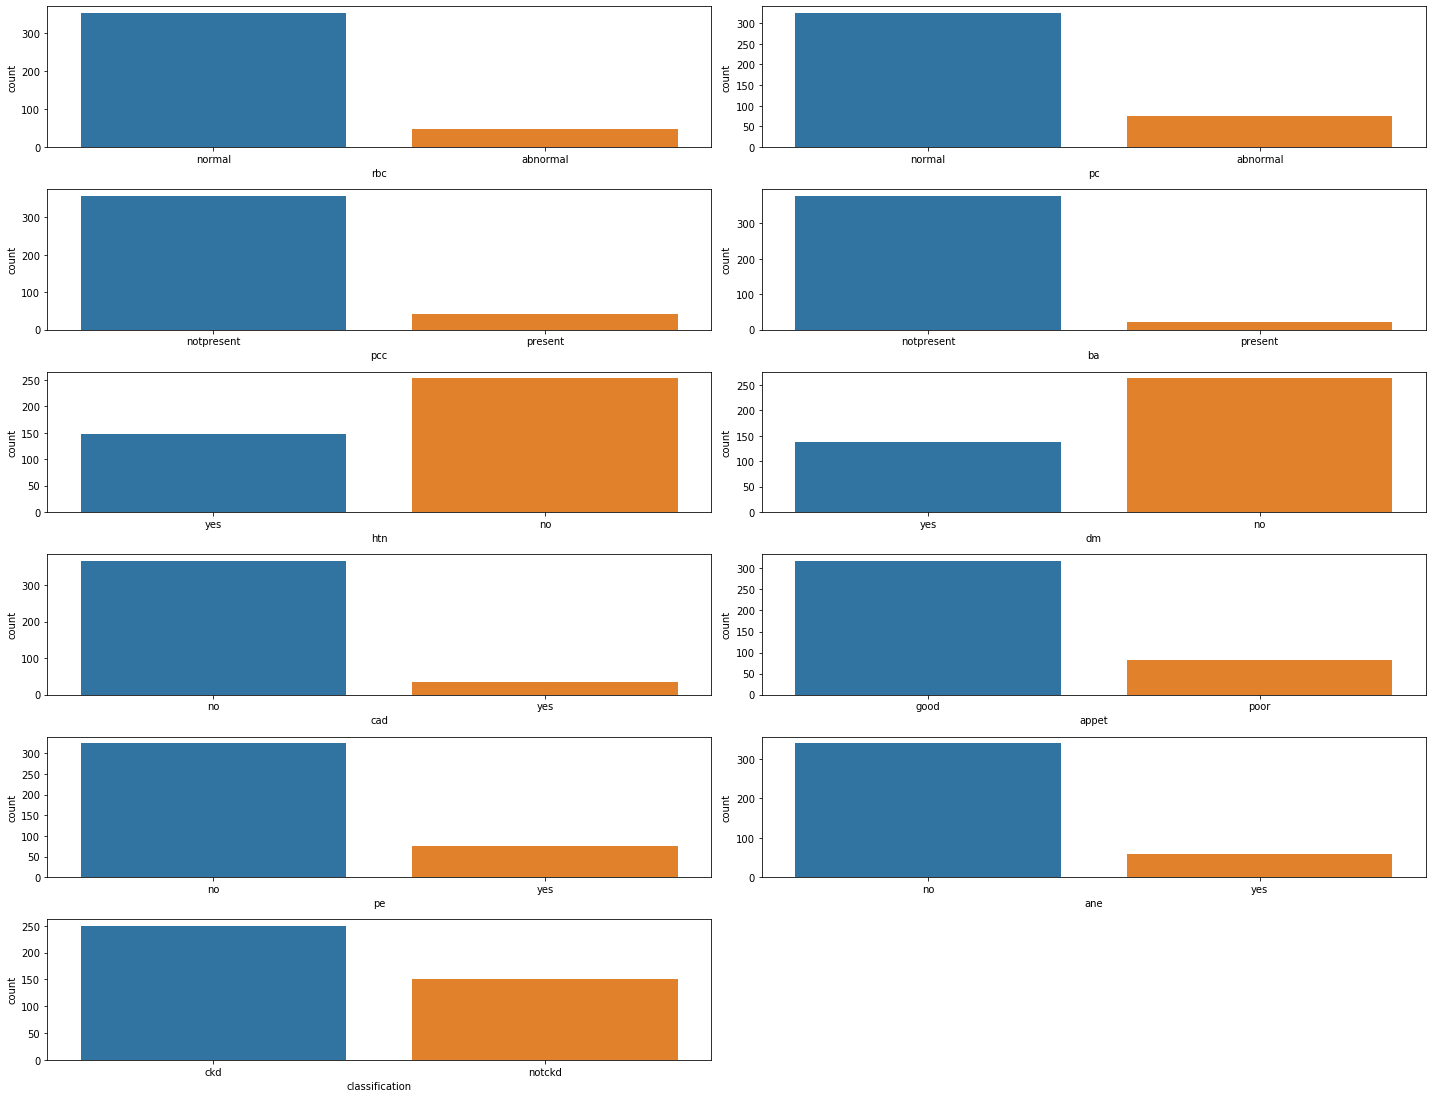

In [107]:
i =1 
fig = plt.figure(figsize=(20,20))
for col in cat_cols:
    plt.subplot(8,2,i)
    sns.countplot(data[col])
    i = i+1
plt.tight_layout()
plt.show()

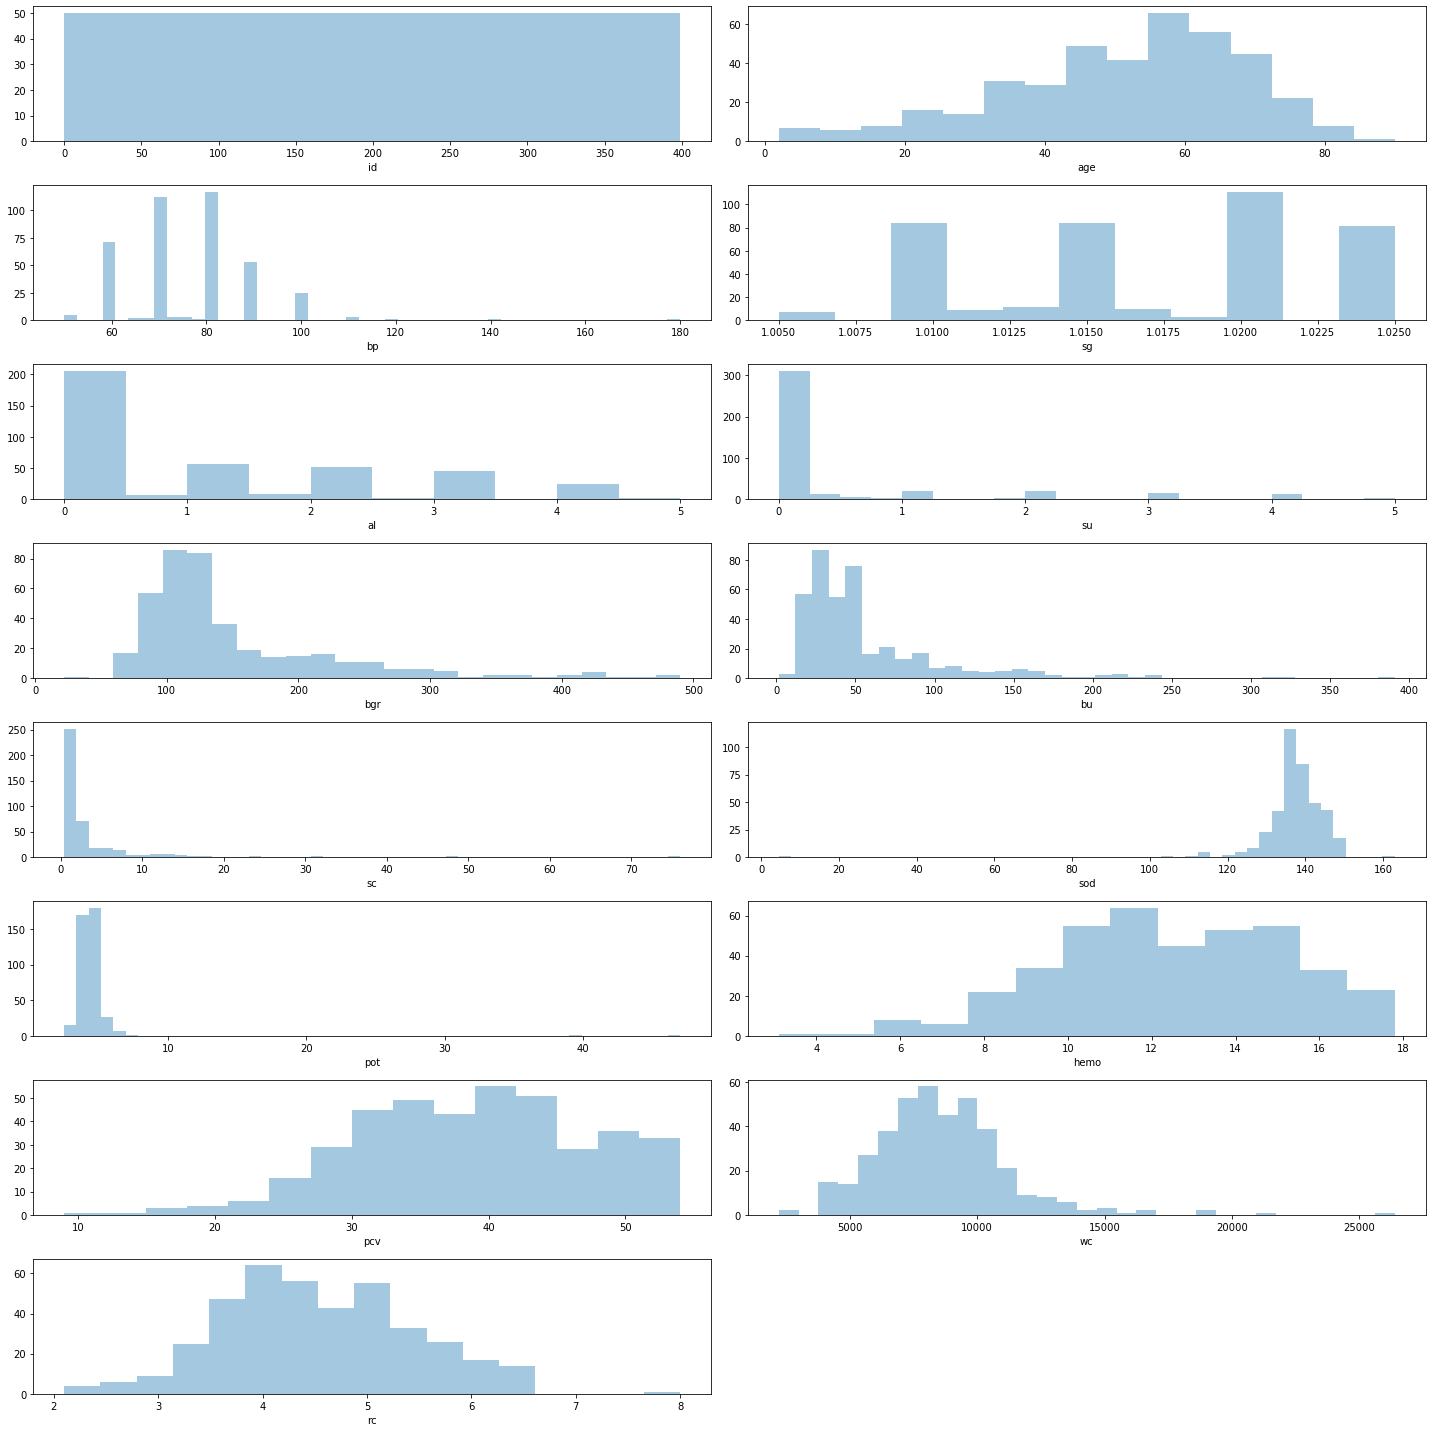

In [125]:
i =1 
fig = plt.figure(figsize=(20,20))
for col in num_cols:
    plt.subplot(8,2,i)
    sns.distplot(data[col],kde=False)
    i = i+1
plt.tight_layout()
plt.show()

In [58]:
data = data.drop('id',axis = 1)

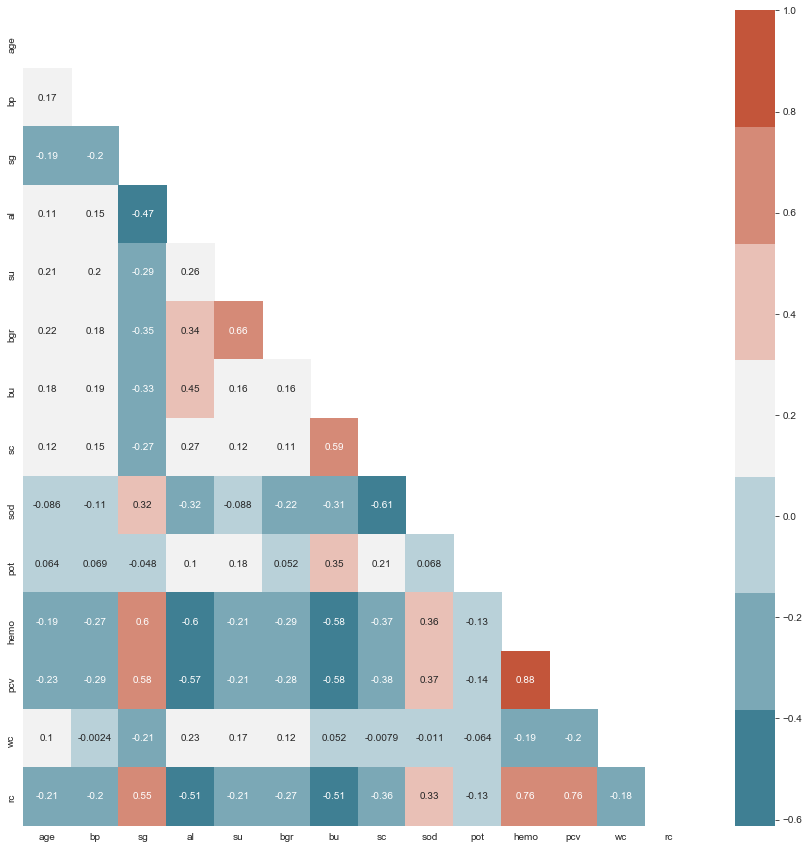

In [163]:
mask = np.zeros_like(data.corr(),dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style= 'white')
fig = plt.figure(figsize=(15,15))
plt.subplot(1,1,1)
sns.heatmap(data.corr(),cmap = sns.diverging_palette(220, 20, n=7),annot = True,mask = mask )
plt.show()

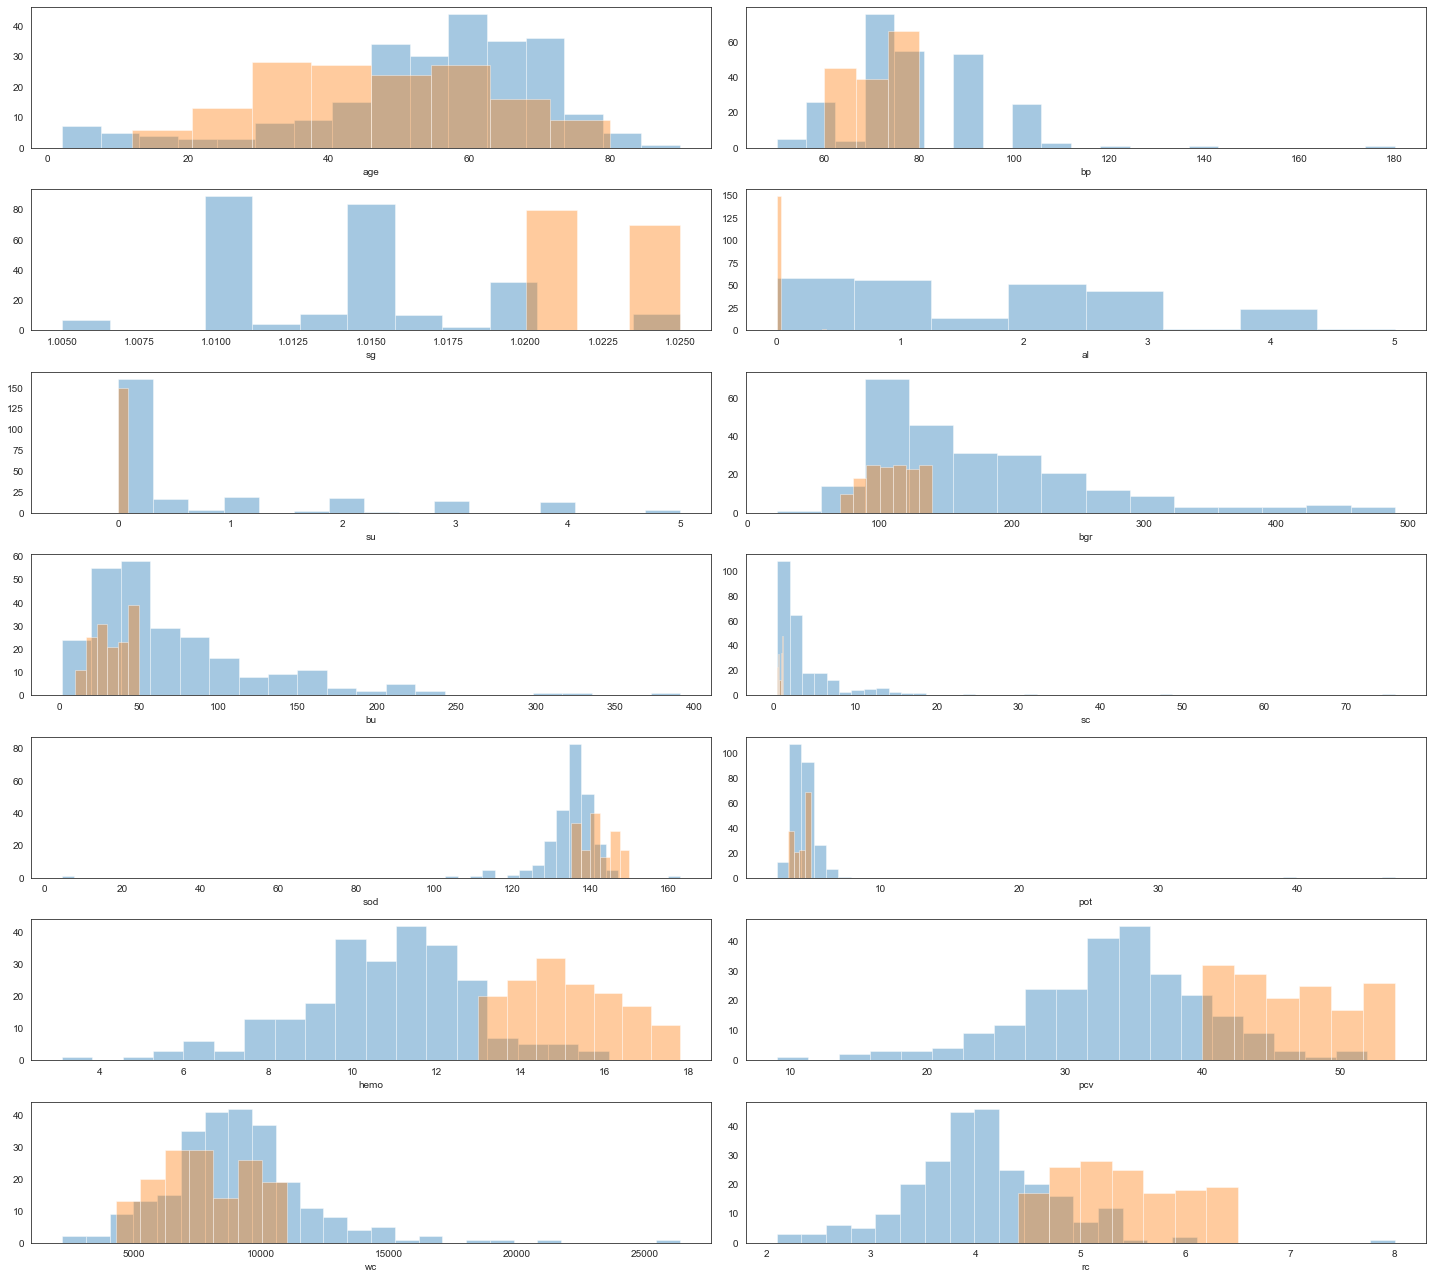

In [184]:
i = 1
fig = plt.figure(figsize=(20,20))
for col in data.select_dtypes(["int64","float64"]):
    plt.subplot(8,2,i)
    sns.distplot(data.loc[data.classification == 'ckd',col], kde = False,label = 'ckd')
    sns.distplot(data.loc[data.classification == 'notckd',col],kde=False,label = 'notckd')
    i = i+1
plt.tight_layout()
plt.show()

classification  ckd  notckd
rbc                        
abnormal         47       0
normal          203     150


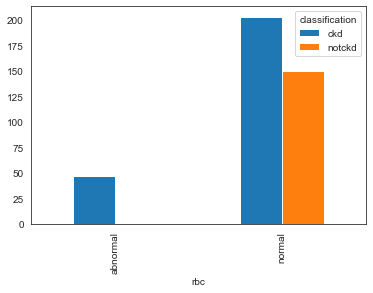

In [189]:
print(pd.crosstab(data['rbc'],data['classification']))
pd.crosstab(data['rbc'],data['classification']).plot(kind= 'bar')
plt.show()

classification  ckd  notckd
ba                         
notpresent      228     150
present          22       0


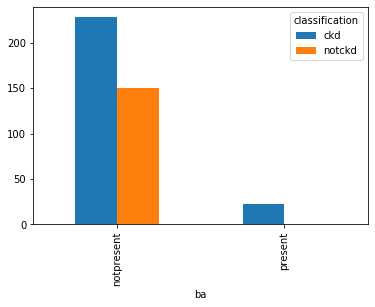

In [30]:
print(pd.crosstab(data['ba'],data['classification']))
pd.crosstab(data['ba'],data['classification']).plot(kind= 'bar')
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
tgt_col = ['classification']
cat_col = [col for col in list(data.nunique()[data.nunique()<20].index) if col not in tgt_col]
num_col = [col for col in data.columns if col not in tgt_col+cat_col]
bin_col = list(data.nunique()[data.nunique()==2].index)
mul_col = [col for col in cat_col if col not in bin_col]

In [43]:
le = LabelEncoder()
for col in bin_col :
    data[col] = le.fit_transform(data[col])

In [48]:
data = pd.get_dummies(data= data,columns = mul_col)

In [60]:
data.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,...,su_0.6,su_0.8,su_1.0,su_1.2,su_1.8,su_2.0,su_2.2,su_3.0,su_4.0,su_5.0
0,0.522727,1,1,0,0,0.211538,0.088575,0.010582,0.801893,0.032809,...,0,0,0,0,0,0,0,0,0,0
1,0.056818,1,1,0,0,0.346581,0.042362,0.005291,0.788013,0.033708,...,0,0,0,0,0,0,0,0,0,0
2,0.681818,1,1,0,0,0.856838,0.132221,0.018519,0.818297,0.044944,...,0,0,0,0,0,0,0,1,0,0
3,0.522727,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.556818,1,1,0,0,0.179487,0.062901,0.013228,0.790536,0.029663,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.preprocessing import MinMaxScaler
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
mn = MinMaxScaler()


In [ ]:
data[num_cols] = mn.fit_transform(data[num_cols])

In [63]:
Y = data['classification']
X = data.drop('classification',axis = 1)

In [64]:
X.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,...,su_0.6,su_0.8,su_1.0,su_1.2,su_1.8,su_2.0,su_2.2,su_3.0,su_4.0,su_5.0
0,0.522727,1,1,0,0,0.211538,0.088575,0.010582,0.801893,0.032809,...,0,0,0,0,0,0,0,0,0,0
1,0.056818,1,1,0,0,0.346581,0.042362,0.005291,0.788013,0.033708,...,0,0,0,0,0,0,0,0,0,0
2,0.681818,1,1,0,0,0.856838,0.132221,0.018519,0.818297,0.044944,...,0,0,0,0,0,0,0,1,0,0
3,0.522727,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.556818,1,1,0,0,0.179487,0.062901,0.013228,0.790536,0.029663,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold

In [71]:
folds = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in folds.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [72]:
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score : ")
print(accuracy_score(Y_test, y_pred))

Accuracy Score : 
0.9875


In [73]:
confusion_matrix(Y_test, y_pred)

array([[45,  1],
       [ 0, 34]], dtype=int64)

In [74]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      1.00      0.99        34

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [78]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score :")
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

Accuracy Score :
0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      1.00      0.99        34

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



array([[45,  1],
       [ 0, 34]], dtype=int64)

In [86]:
from sklearn.model_selection import cross_val_score
C_range = list(np.arange(0.1,2,0.1))
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc, X, Y,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.985, 0.9825000000000002, 0.9825000000000002, 0.985, 0.985, 0.985, 0.9875, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999, 0.9899999999999999]


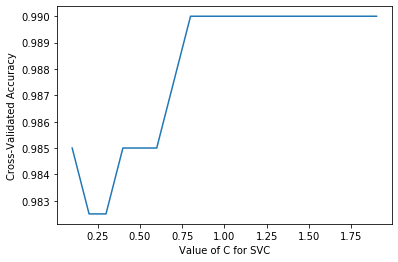

In [87]:
plt.plot(C_range, acc_score)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [83]:
gamma_range = [0.0001, 0.001, 0.01, 0.1]
acc_score =[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.625, 0.625, 0.9774999999999998, 0.985]


Text(0, 0.5, 'Cross validated accuracy')

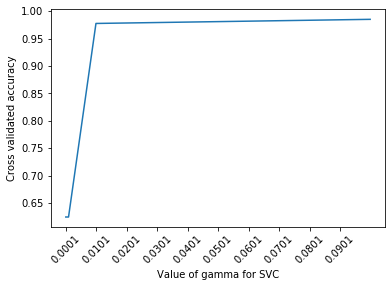

In [84]:
plt.plot(gamma_range, acc_score)
plt.xlabel('Value of gamma for SVC')
plt.xticks(np.arange(0.0001, 0.1, 0.01), rotation=45)
plt.ylabel('Cross validated accuracy')